# Importing Libraries and Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# prompt: mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/Datasets/postpartum_dataset.csv'

cp: missing destination file operand after '/content/drive/MyDrive/Datasets/postpartum_dataset.csv'
Try 'cp --help' for more information.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/postpartum_dataset.csv')

# Analyzing Dataset

In [ ]:
data.shape

(1503, 12)

In [ ]:
data.head(5)

,ID,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,1,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,2,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,3,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,4,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,5,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
data.tail(5)

,ID,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
1498,1499,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,1500,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,1501,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,1502,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No
1502,1503,6/15/2022 0:36,45-50,Sometimes,Sometimes,Two or more days a week,No,No,No,Maybe,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   ID                                         1503 non-null   int64 
 1   Timestamp                                  1503 non-null   object
 2   Age                                        1503 non-null   object
 3   Feeling sad or Tearful                     1503 non-null   object
 4   Irritable towards baby & partner           1497 non-null   object
 5   Trouble sleeping at night                  1503 non-null   object
 6   Problems concentrating or making decision  1491 non-null   object
 7   Overeating or loss of appetite             1503 non-null   object
 8   Feeling anxious                            1503 non-null   object
 9   Feeling of guilt                           1494 non-null   object
 10  Problems of bonding with baby       

# Data Preprocessing

In [ ]:
data = data.drop(["ID","Timestamp"], axis = 1)

In [ ]:
data = data.dropna()

In [ ]:
categorical_columns = data.select_dtypes(include='object').columns

for column in categorical_columns:
    print(f"Unique values in '{column}': {data[column].unique()}")

Unique values in 'Age': ['35-40' '40-45' '30-35' '45-50' '25-30']
Unique values in 'Feeling sad or Tearful': ['Yes' 'No' 'Sometimes']
Unique values in 'Irritable towards baby & partner': ['Yes' 'No' 'Sometimes']
Unique values in 'Trouble sleeping at night': ['Two or more days a week' 'No' 'Yes']
Unique values in 'Problems concentrating or making decision': ['Yes' 'No' 'Often']
Unique values in 'Overeating or loss of appetite': ['Yes' 'No' 'Not at all']
Unique values in 'Feeling anxious': ['Yes' 'No']
Unique values in 'Feeling of guilt': ['No' 'Yes' 'Maybe']
Unique values in 'Problems of bonding with baby': ['Yes' 'Sometimes' 'No']
Unique values in 'Suicide attempt': ['Yes' 'No' 'Not interested to say']


In [ ]:
data.head(5)

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [ ]:
data.shape

(1491, 10)

In [ ]:
data.tail(5)

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
1498,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No
1502,45-50,Sometimes,Sometimes,Two or more days a week,No,No,No,Maybe,No,No


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data.tail(5)

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
1486,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1487,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1488,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1489,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No
1490,45-50,Sometimes,Sometimes,Two or more days a week,No,No,No,Maybe,No,No


In [ ]:
data.isnull().sum()

,0
Age,0
Feeling sad or Tearful,0
Irritable towards baby & partner,0
Trouble sleeping at night,0
Problems concentrating or making decision,0
Overeating or loss of appetite,0
Feeling anxious,0
Feeling of guilt,0
Problems of bonding with baby,0
Suicide attempt,0


Class Distribution:
Feeling anxious
Yes    968
No     523
Name: count, dtype: int64


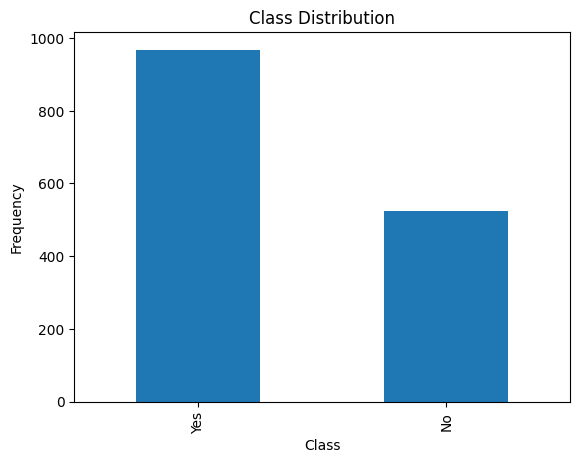

In [ ]:
target_column = 'Feeling anxious'

class_distribution = data[target_column].value_counts()

print("Class Distribution:")
print(class_distribution)
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Percentage distribution of each class
class_percentage = (class_distribution / len(data)) * 100
print("\nPercentage Distribution:")
print(class_percentage)

# Check for imbalance
if class_percentage.min() < 10:
    print("\nThe dataset is imbalanced.")
else:
    print("\nThe dataset is balanced.")



Percentage Distribution:
Feeling anxious
Yes    64.922871
No     35.077129
Name: count, dtype: float64

The dataset is balanced.


# Encoding, Bar Charts and Correlation Matrix

In [ ]:
# Apply one-hot encoding
encoded_data = pd.get_dummies(data, drop_first=True)

# Convert any True/False to 1/0
encoded_data = encoded_data.replace({True: 1, False: 0})

encoded_data.head()


<ipython-input-20-c2a4020fe815>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_data = encoded_data.replace({True: 1, False: 0})


,Age_30-35,Age_35-40,Age_40-45,Age_45-50,Feeling sad or Tearful_Sometimes,Feeling sad or Tearful_Yes,Irritable towards baby & partner_Sometimes,Irritable towards baby & partner_Yes,Trouble sleeping at night_Two or more days a week,Trouble sleeping at night_Yes,...,Problems concentrating or making decision_Yes,Overeating or loss of appetite_Not at all,Overeating or loss of appetite_Yes,Feeling anxious_Yes,Feeling of guilt_No,Feeling of guilt_Yes,Problems of bonding with baby_Sometimes,Problems of bonding with baby_Yes,Suicide attempt_Not interested to say,Suicide attempt_Yes
0,0,1,0,0,0,1,0,1,1,0,...,1,0,1,1,1,0,0,1,0,1
1,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
2,0,1,0,0,0,1,0,0,0,1,...,1,0,1,1,1,0,1,0,0,0
3,0,1,0,0,0,1,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [ ]:
data = encoded_data

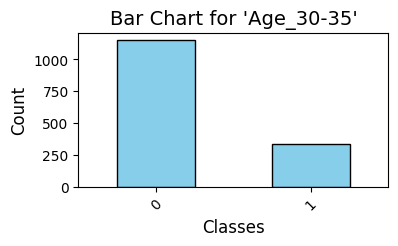

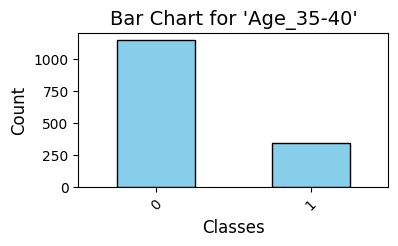

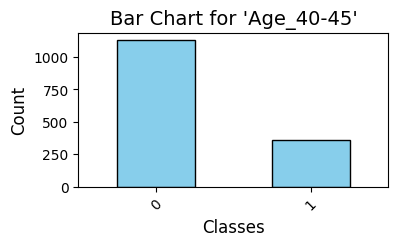

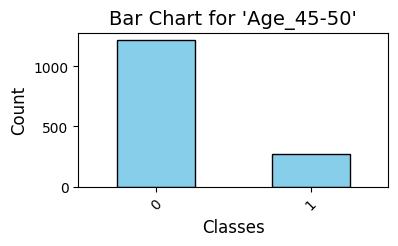

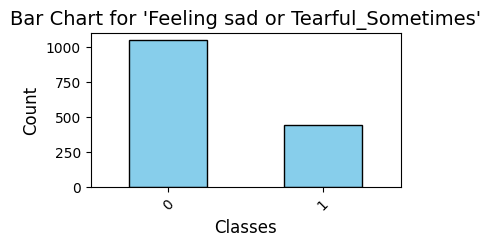

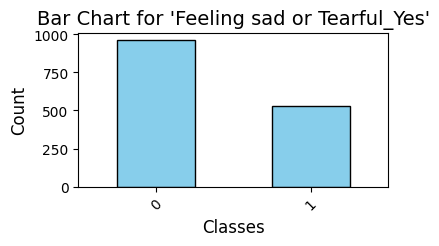

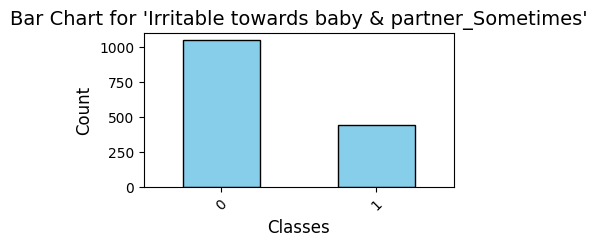

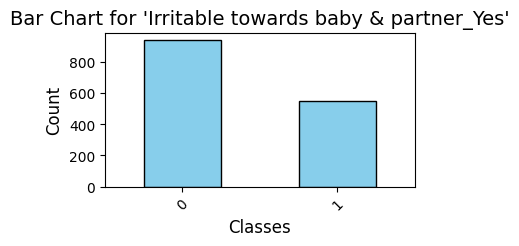

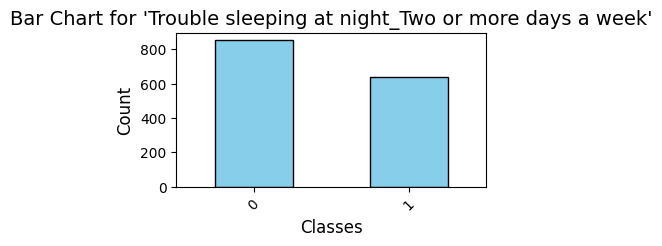

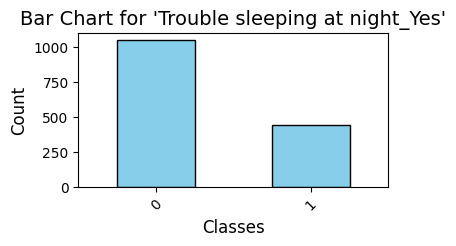

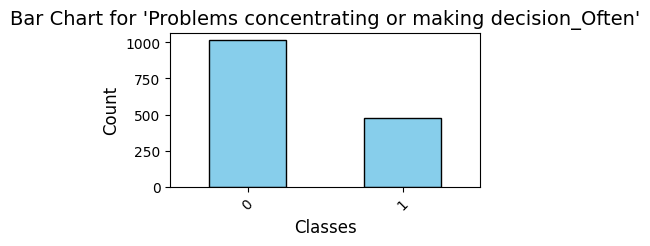

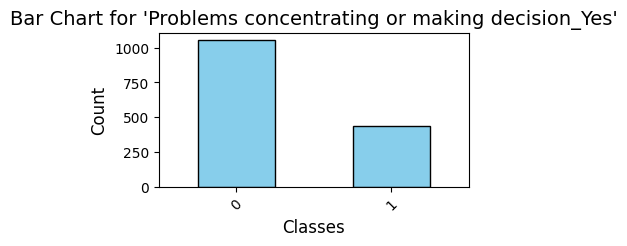

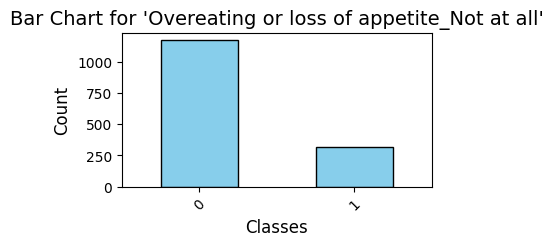

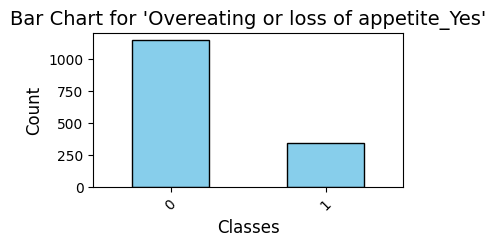

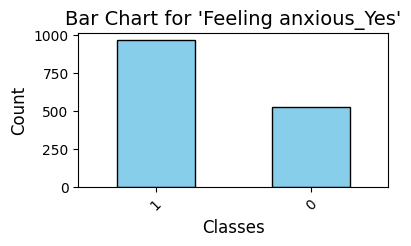

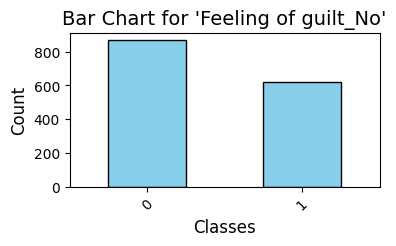

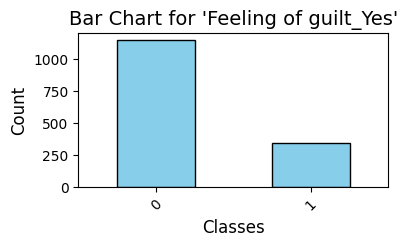

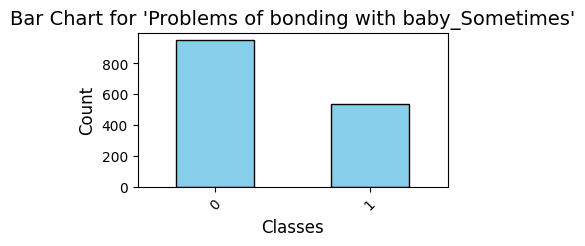

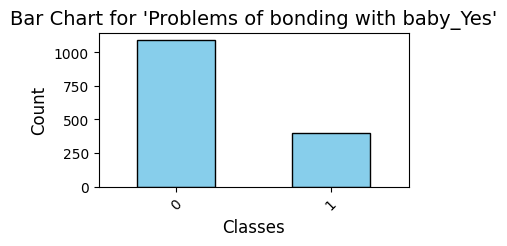

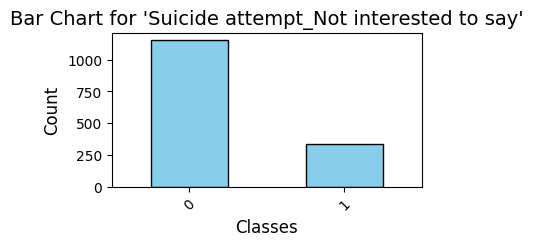

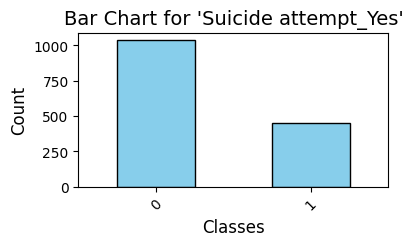

In [ ]:
for column in data.columns:
    # Get the counts of unique values in the column
    value_counts = data[column].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(4, 2))
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    # Add titles and labels
    plt.title(f"Bar Chart for '{column}'", fontsize=14)
    plt.xlabel("Classes", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()
    print("\n")

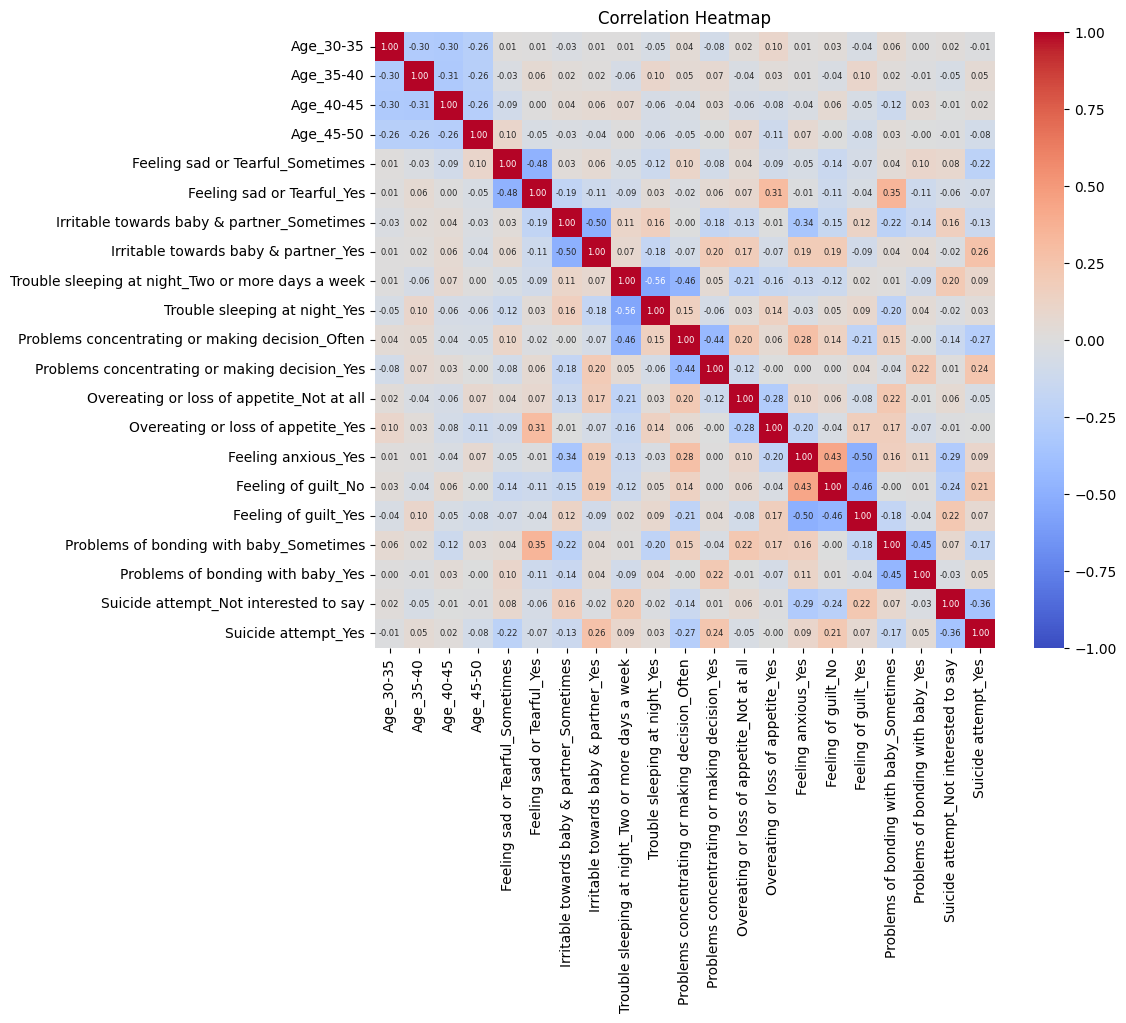

In [ ]:
import seaborn as sns

corr_matrix = data.corr()

# Creating the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True, annot_kws={'size': 6})
plt.title('Correlation Heatmap')
plt.show()

# Data Splitting

In [ ]:
y = data['Feeling anxious_Yes']
X = data.drop(columns=['Feeling anxious_Yes', 'Trouble sleeping at night_Two or more days a week'])

In [ ]:
from sklearn.model_selection import train_test_split


# Perform stratified split, ensuring the distribution of "Yes" and "No" is similar in train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)


# Predicting with KNN, Naive Bayes and Decision Tree

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Naive Bayes Model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Output the results
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

KNN Accuracy: 0.8817
Naive Bayes Accuracy: 0.8259
Decision Tree Accuracy: 0.9710


# Plotting accuracy, precision, recall, f1 scores

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, classification_report

# Precision, Recall, F1 score
precision_knn, recall_knn, f1_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='binary', pos_label=1)
precision_nb, recall_nb, f1_nb, _ = precision_recall_fscore_support(y_test, y_pred_nb, average='binary', pos_label=1)
precision_dt, recall_dt, f1_dt, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='binary', pos_label=1)

# Store results for easy plotting
models = ['KNN', 'Naive Bayes', 'Decision Tree']
accuracies = [accuracy_knn, accuracy_nb, accuracy_dt]
precisions = [precision_knn, precision_nb, precision_dt]
recalls = [recall_knn, recall_nb, recall_dt]
f1_scores = [f1_knn, f1_nb, f1_dt]
print(accuracies)
print(precisions)
print(recalls)
print(f1_scores)


[0.8816964285714286, 0.8258928571428571, 0.9709821428571429]
[0.8993288590604027, 0.8790035587188612, 0.9793103448275862]
[0.9209621993127147, 0.8487972508591065, 0.9759450171821306]
[0.9100169779286927, 0.8636363636363636, 0.9776247848537005]


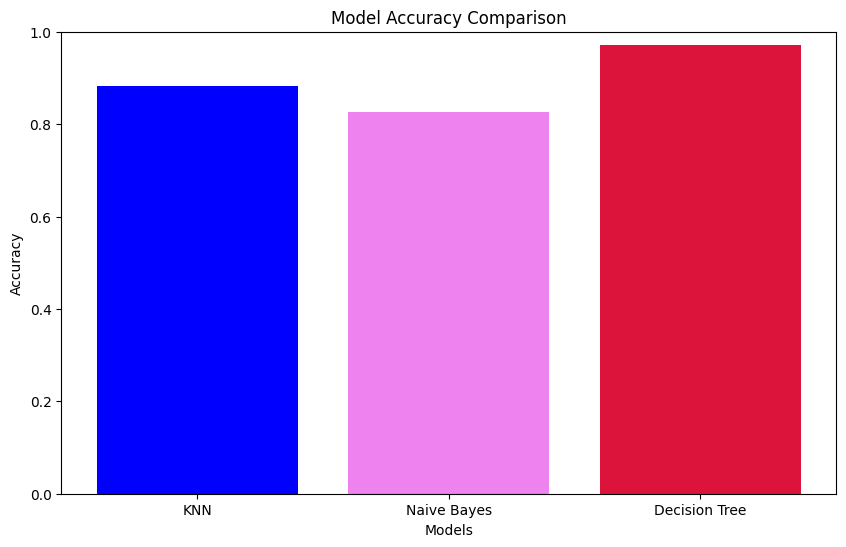

In [ ]:
# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'violet', 'crimson'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

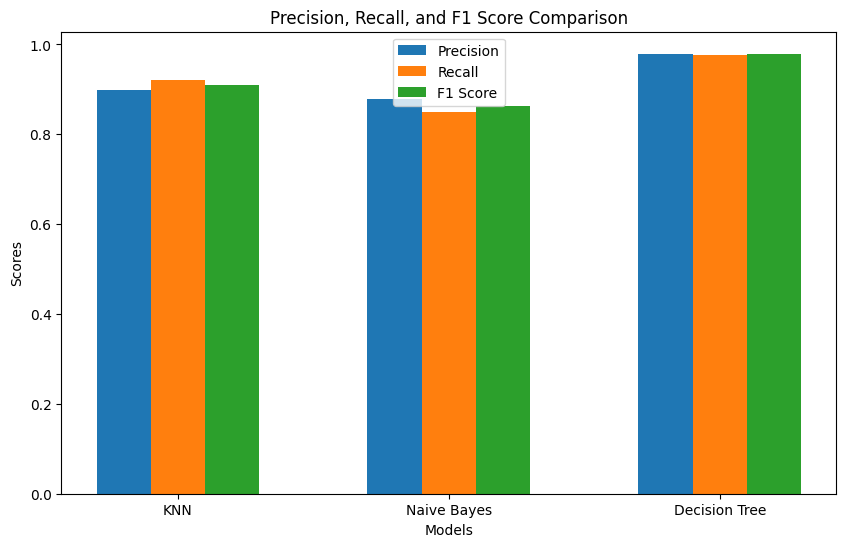

In [ ]:
# Plot Precision, Recall, F1 comparison
labels = ['Precision', 'Recall', 'F1 Score']
model_metrics = [precisions, recalls, f1_scores]

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  # Width of the bars
x = range(len(models))

# Plot for each metric
for i, metric in enumerate(model_metrics):
    ax.bar([p + width * i for p in x], metric, width=width, label=labels[i])

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score Comparison')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(models)
ax.legend()

plt.show()


# Calculate and plot confusion matrix

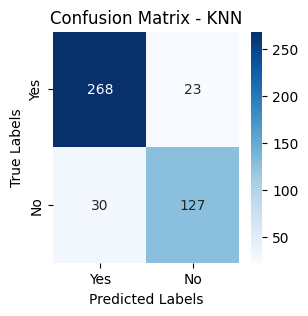

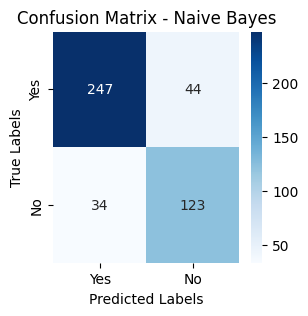

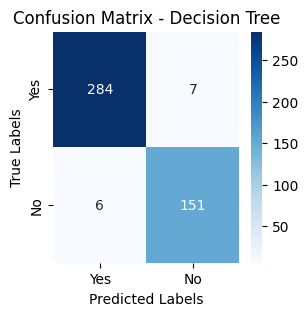

In [ ]:
# Compute confusion matrix for each model
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=[1,0])
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=[1,0])
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=[1,0])

# Plot confusion matrix for KNN
plt.figure(figsize=(3,3))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Confusion Matrix - KNN')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()
print('\n')
# Plot confusion matrix for Naive Bayes
plt.figure(figsize=(3,3))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()
print('\n')
# Plot confusion matrix for Decision Tree
plt.figure(figsize=(3,3))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()
print('\n')